<h1 align='center'>Predicción de diabetes utilizando una red Perceptrón Multicapa (MLP)</h1>

La diabetes es una enfermedad metabólica crónica que afecta la forma en que el cuerpo convierte los alimentos en energía. El cuerpo humano requiere de insulina para poder procesar la glucosa obtenida de los alimentos. Sin embargo, cuando se presenta esta enfermedad, no produce la cantidad suficiente de insulina (diabetes tipo I) o no se logra sintetizar adecuadamente (diabetes tipo II), lo cual conlleva a daños graves en el corazón, los vasos sanguíneos, los ojos, los riñones y los nervios. 

Según la Organización Panamericana de la Salud [1], se estima que en el mundo hay 422 millones de personas que padecen diabetes, de las cuales, 62 millones de personas están en el continente americano. 

Las causas exactas de esta enfermedad son desconocidas, no obstante, existen diferentes factores fisiológicos o genéticos que pueden predisponer a un paciente a padecerla. Por lo cual, en este proyecto se busca analizar un dataset proporcionado por el National Institute of Diabetes and Digestive and Kidney Diseases [2] con el fin de entrenar una red neuronal MLP para predecir la presencia de diabetes en una persona según factores fisiológicos.

<h3>Composición de los datos</h3>

Este dataset se compone de 9 características y 1 target binario:

- **Id:** Identificador del paciente.
- **Pregnancies:** Cantidad de embarazos.
- **Glucose:** Concentracción de glucosa en sangre durante 2 horas después de administrar una cantidad determinada de glucosa.
- **BloodPressure:** Presión arterial diastólica (mmHg).
- **SkinThickness:** Grosor del pliegue del tríceps (mm).
- **Insulin:** Nivel de insulina sérica durante dos horas(mU/ml).
- **BMI:** Índice de masa corporal (Kg/m2).
- **DiabetesPedigreeFunction:** Probabilidad de diabetes según los antecedentes familiares, el valor 0 representa personas sanas y 1 representa aquellas con predisposición a diabetes.
- **Age:** Edad en años.
- **Outcome (target):** Clasificación binaria que indica la presencia (1) o ausencia (0) de diabetes.

<h3>Referencias</h3>

[1] Organización Panamericana de la Salud, “Diabetes,” Pan American Health Organization
(PAHO), 2021. Aproximadamente 62 millones de personas,a la diabetes cada año. [En línea]. Disponible: https://www.paho.org/es/temas/diabetes#:~:text= 

[2] Dataset Records for National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). National Institutes of Health, 2023.

[3] Diabetes tipo 2. National Institute of Diabetes and Digestive and Kidney Diseases, 2017. [En línea]. Disponible: https://www.niddk.nih.gov/health-information/informacion-de-la-salud/diabetes/informacion-general/que-es/diabetes-tipo-2

[4] E. Medina, et.al. Diabetes gestacional. Diagnóstico y tratamiento en el primer nivel de atención. Scielo, vol. 33, n.º 1, pp. 91–98, 2017.

<h3>Importación de librerías</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import datetime, os
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

<h3>Cargue de Dataset</h3>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/angievalentinapg/Neural-Network-MLP-Project/main/Healthcare-Diabetes.csv')
print(df.shape)
df.head(10)

(2768, 10)


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


<h3>Preprocesamiento de datos</h3>

Se elimina la columna 'Id' dado que es un identificador y no aporta información relevante al modelo. Adicionalmente, se renombra la columna 'Outcome' a 'PresenceDiabetes' para tener un nombre más sugerente.

In [3]:
df.drop(columns=['Id'], inplace=True)
df.rename({'Outcome': 'PresenceDiabetes'}, axis=1, inplace=True)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,PresenceDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   PresenceDiabetes          2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,PresenceDiabetes
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


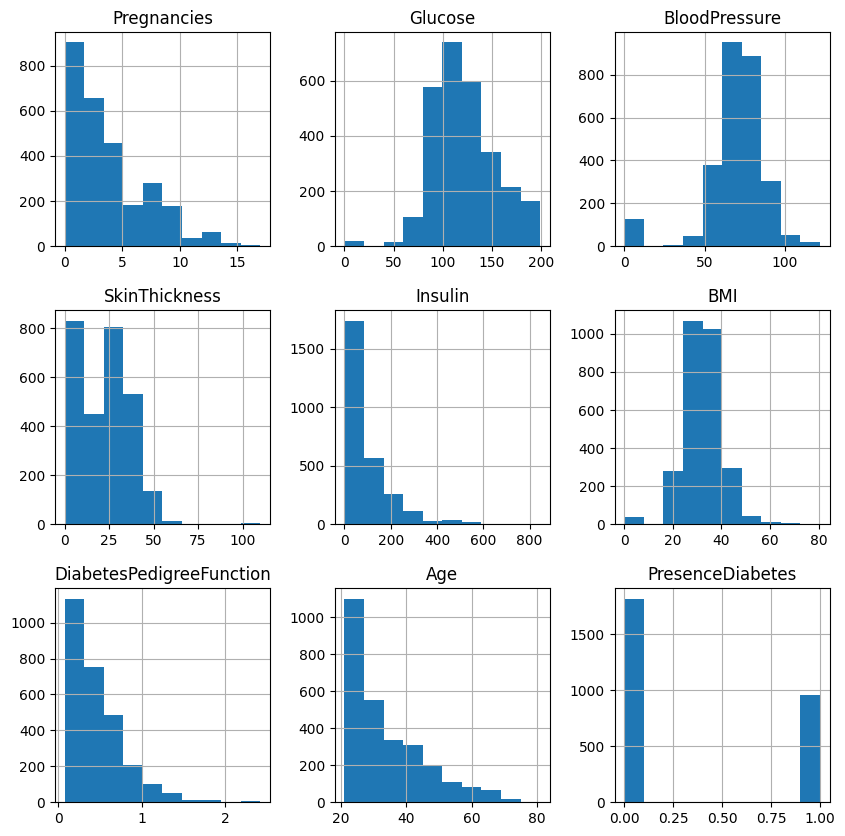

In [6]:
df.hist(figsize=(10,10))
plt.show()

<h3>Coeficiente de correlación</h3>

En este ánalisis se puede observar varias correlaciones importantes, la cual se relaciona con los estudios realizados [1].

- Los niveles de glucosa tienen una fuerte correlación con la presencia de la enfermedad.
- Las personas con sobrepeso tienen mayor riesgo de presentar diabetes, esto se evidencia en la correlación entre el BMI y la presencia de diabetes.
- La edad presenta una fuerte correlación dado que la probabilidad de desarrollar diabetes tipo 2 (el tipo más común de diabetes) es mayor si se tiene 45 años o más [3]. 
- La diabetes gestacional tiene una prevalencia del 1% al 14% dado que el embarazo implica un aumento en el metabolismo. por lo cual, para mantener los niveles de glucosa se necesita producir más insulina. Cuando la cantidad adicional que produce no es suficiente, la glucosa en sangre se eleva a niveles fuera de los valores normales [4].

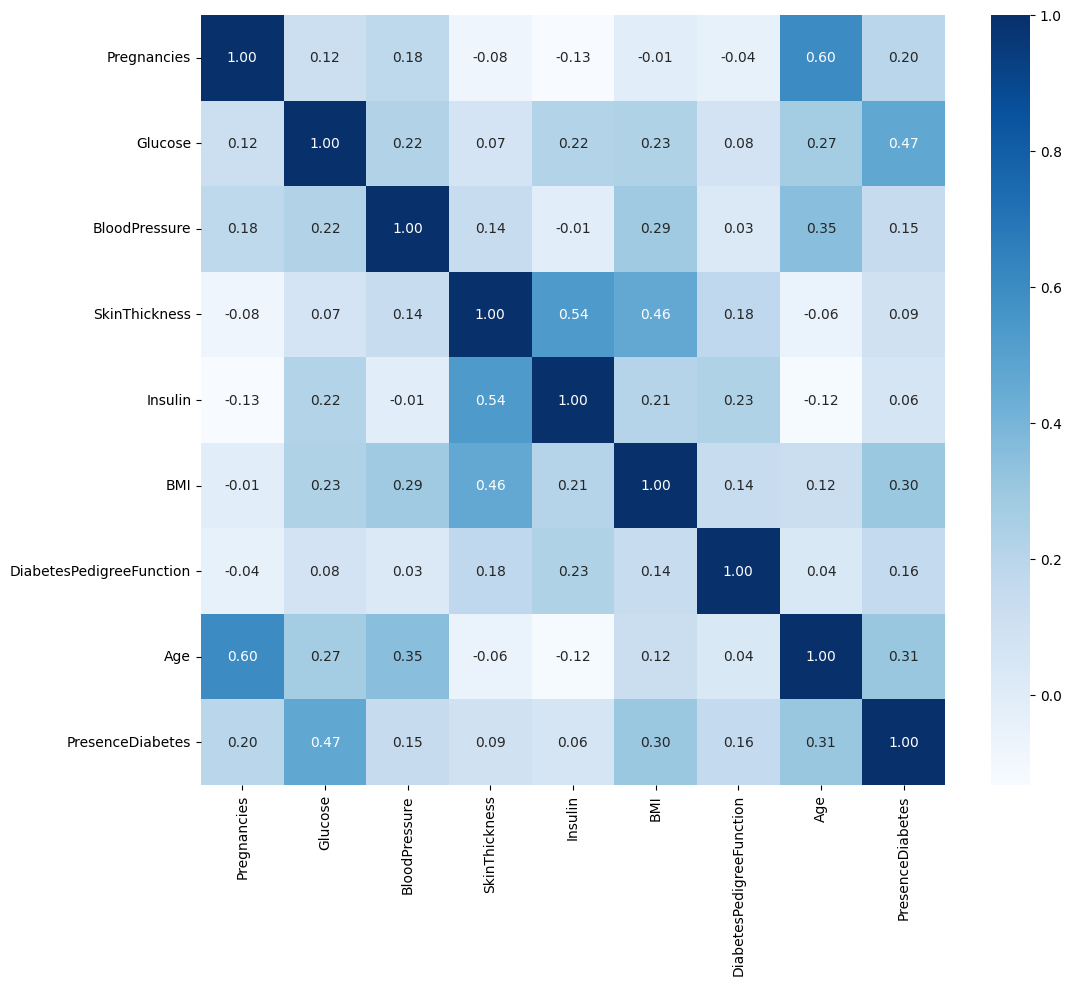

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
correlacion = df.corr(method="spearman", numeric_only=True)
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='Blues')
plt.show()

<h3>División de los datos</h3>

Se dividen las entradas y salidas en datos de entrenamiento (65%) y testeo (35%).

In [8]:
data = df.copy()
data = data.drop(columns=['PresenceDiabetes'])
print(data.shape)

(2768, 8)


In [9]:
target = df.copy()
target = target['PresenceDiabetes']
print(target.shape)

(2768,)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1799, 8)
(1799,)
(969, 8)
(969,)


<h3>Normalización de los datos</h3>



In [11]:
scaler = MinMaxScaler()
x_train_norm = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test_norm = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)
x_train_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.869347,0.606557,0.000000,0.000000,0.456576,0.004270,0.283333
1,0.470588,0.718593,0.540984,0.000000,0.000000,0.433002,0.021776,0.333333
2,0.058824,0.608040,0.639344,0.354545,0.087470,0.483871,0.078138,0.116667
3,0.058824,0.613065,0.737705,0.463636,0.260047,0.616625,0.105465,0.166667
4,0.058824,0.597990,0.442623,0.118182,0.059102,0.276675,0.054227,0.050000
...,...,...,...,...,...,...,...,...
1794,0.235294,0.477387,0.524590,0.000000,0.000000,0.397022,0.035440,0.166667
1795,0.588235,0.899497,0.573770,0.000000,0.000000,0.435484,0.052092,0.266667
1796,0.294118,0.517588,0.885246,0.336364,0.000000,0.486352,0.096926,0.733333
1797,0.058824,0.487437,0.524590,0.172727,0.096927,0.225806,0.094364,0.000000


<h3>Arquitectura del modelo</h3>

Se emplea un modelo de 5 capas densas conectadas con activaciones ReLu en las 4 capas ocultas y una activacación sigmoide en la capa de salida dado que se trata de una clasificación binaria.

Finalmente, la función de pérdida utilizada es la entropía cruzada binaria ('binary_crossentropy'), que es comúnmente utilizada para problemas de clasificación binaria cuando el modelo produce probabilidades como salida. El optimizador Adam se utiliza para entrenar el modelo, con una tasa de aprendizaje de 0.001. Además, la métrica de evaluación del modelo es la precisión ('accuracy'). 

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_dim=8),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

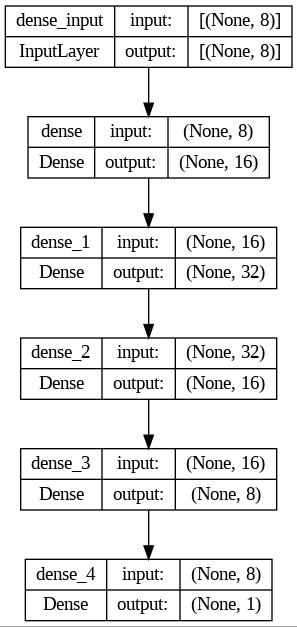

In [13]:
plot_model(model, to_file = 'model.jpg', show_shapes = True)

<h3>Entrenamiento del modelo</h3>

In [14]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [15]:
hist = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=800, verbose=0,callbacks=[tensorboard_callback])

<h3>Evaluación del modelo</h3>

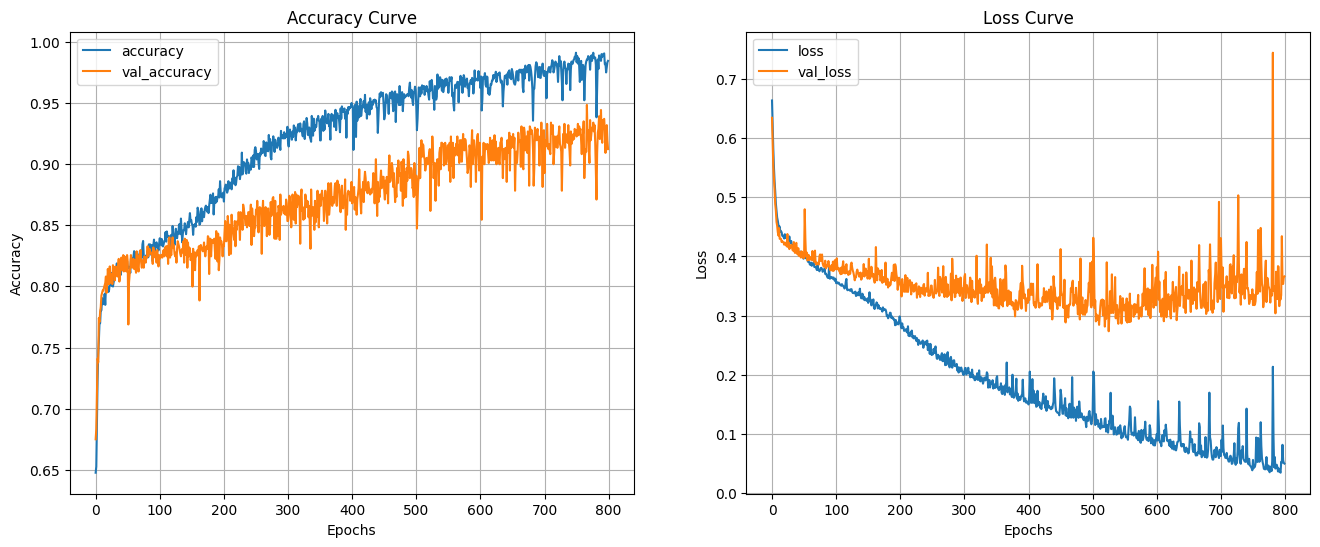

In [16]:
f = plt.figure(figsize=(16,6))
f.add_subplot(1,2,1)

plt.plot(hist.epoch,hist.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(hist.epoch,hist.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

f.add_subplot(1,2,2)

plt.plot(hist.epoch,hist.history['loss'],label="loss") # Loss curve for training set
plt.plot(hist.epoch,hist.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve")
plt.xlabel("Epochs",)
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.show()

In [17]:
loss, accuracy = model.evaluate(x_test_norm, y_test, verbose=0)

print(f"Loss on test set: {round(loss,3)}")
print(f"Accuracy on test set: {round(accuracy,3)}")

Loss on test set: 0.366
Accuracy on test set: 0.912


31/31 [==============================] - 0s 2ms/step


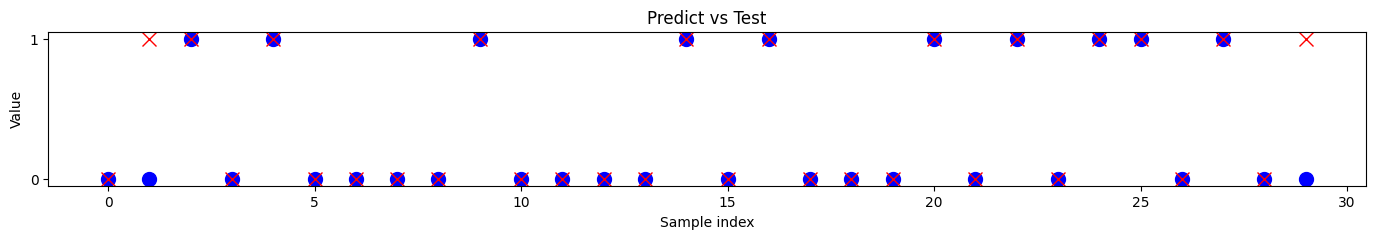

In [18]:
y_pred_prob = model.predict(x_test_norm)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

plt.rcParams['figure.figsize'] = [17, 2]
plt.plot(range(len(y_test[0:30])), y_test[0:30], 'bo', markersize=10)
plt.plot(range(len(y_pred[0:30])), y_pred[0:30], 'rx', markersize=10)

plt.title("Predict vs Test")
plt.xlabel("Sample index",)
plt.ylabel("Value")
plt.yticks([0,1])

plt.show()

In [19]:
print(classification_report(y_test,y_pred))
print(f'Accuracy: {round(accuracy_score(y_test, y_pred),3)}')
print(f'Precision: {round(precision_score(y_test, y_pred),3)}')
print(f'Recall: {round(recall_score(y_test, y_pred),3)}')
print(f'F1 Score: {round(f1_score(y_test,y_pred),3)}')

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       650
           1       0.81      0.96      0.88       319

    accuracy                           0.91       969
   macro avg       0.89      0.92      0.90       969
weighted avg       0.92      0.91      0.91       969

Accuracy: 0.912
Precision: 0.811
Recall: 0.956
F1 Score: 0.878


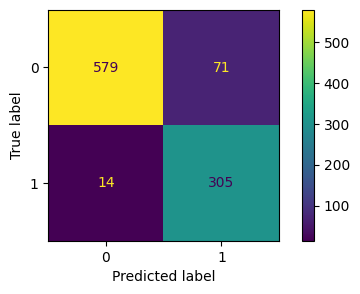

In [20]:
conf_mat = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
conf_mat.figure_.set_size_inches(6, 3)

<h3>Conclusiones</h3>

- Las condiciones fisiológicas y genéticas varían ampliamente en la predicción de la diabetes, lo cual refleja la complejidad y los diversos factores que generan el desarrollo de esta enfermedad.
- El nivel de glucosa es la variable con una correlación más fuerte en la presencia de diabetes, hecho que es congruente con la literatura. Adicionalmente, las variables de BMI, cantidad de embarazos y edad también tiene una alta correlación con esta enfermedad, tal como lo muestran diferentes fuentes [3][4].
-  La eficacia del modelo puede mejorar al incluir la selección de características más relevantes y la optimización de hiperparámetros del modelo.
- Teniendo en cuenta las características proporcionadas por la fuente de los datos, se puede considerar un potencial sesgo al incluir la variable de cantidad de embarazos, sin embargo, esto no es confirmado al momento de realizar el modelo. 